# Dimensional analysis

The nearest neighbor approach:
Similarly as in example 2.8, study the following curve:



$$
x_1 = \frac{t \cos t}{1 + t^2}, \quad x_2 = \frac{t \sin t}{1 + t^2}, \quad x_3 = t, \quad -2\pi \leq t \leq 2\pi
$$

In [1]:
import numpy as np
import pandas as pd
np.random.seed(1)

# generate random numbers
n = 500
theta = np.random.uniform(-2*np.pi, 2*np.pi, n)
x = (theta*np.cos(theta))/(1+theta**2)
y = (theta*np.sin(theta))/(1+theta**2)
z = theta
df = pd.DataFrame({'x':x, 'y':y, 'z':z})
df

,x,y,z
0,-0.251711,0.431514,-1.042732
1,-0.297543,0.116405,2.768679
2,-0.155257,-0.000223,-6.281748
3,0.274183,0.211756,-2.483962
4,0.057887,-0.206433,-4.438996
...,...,...,...
495,0.116779,-0.134623,5.426927
496,0.123673,-0.125652,5.489850
497,-0.082478,-0.203297,4.326978
498,0.098360,-0.154106,5.280471


In [ ]:
from matplotlib import pyplot as plt
import plotly.express as px
fig = px.scatter_3d(df, x='x', y='y', z='z', color='z')

fig.show()

a) Use idpettis.m to estimate the intrinsic dim

In [4]:
import pyEDAkit as kit
help(kit.IntrinsicDimensionality.id_pettis)

Help on function id_pettis in module pyEDAkit.IntrinsicDimensionality:

id_pettis(X)
    Estimate the intrinsic dimensionality using the Pettis,
        Bailey, Jain, and Dubes algorithm.

    Parameters:
    X (array): Data matrix.

    Returns:
    float: Estimate of intrinsic dimensionality.



In [12]:
from pyEDAkit.IntrinsicDimensionality import id_pettis

eid = id_pettis(df)
eid

np.float64(1.1185140237063393)

b) Add noise of various sizes to your cuvre and thereafter study the intrinsic dim.

add random numbers to the data between the min and max of the dat

In [6]:
# get min and max of each
min_max = df.agg(["min", "max"])
min_max

,x,y,z
min,-0.364484,-0.207026,-6.281748
max,0.364491,0.466570,6.249543


In [10]:
df

,x,y,z
0,-0.251711,0.431514,-1.042732
1,-0.297543,0.116405,2.768679
2,-0.155257,-0.000223,-6.281748
3,0.274183,0.211756,-2.483962
4,0.057887,-0.206433,-4.438996
...,...,...,...
495,0.116779,-0.134623,5.426927
496,0.123673,-0.125652,5.489850
497,-0.082478,-0.203297,4.326978
498,0.098360,-0.154106,5.280471


In [60]:
iterations = 100
n_generated = 100

noise_list = [[0, eid]]
df_noised = df.copy()
np.random.seed(1)
for i in range(1, iterations):
  x = np.random.uniform(min_max['x']['min'], min_max['x']['max'], n_generated//iterations)
  y = np.random.uniform(min_max['y']['min'], min_max['y']['max'], n_generated//iterations)
  z = np.random.uniform(min_max['z']['min'], min_max['z']['max'], n_generated//iterations)

  df_noised = pd.concat([df_noised, pd.DataFrame({'x': x, 'y': y, 'z': z})], ignore_index=True)
  noise_list.append([(n_generated//iterations)*i, id_pettis(df_noised)])
noise_df = pd.DataFrame(noise_list, columns=['n', 'eid'])
noise_df

,n,eid
0,0,1.118514
1,1,1.119464
2,2,1.129494
3,3,1.109481
4,4,1.102973
...,...,...
95,95,1.954354
96,96,2.007681
97,97,2.007681
98,98,2.007681


In [61]:
# plot df_noised
fig = px.scatter_3d(df_noised, x='x', y='y', z='z', color='z')
fig.show()

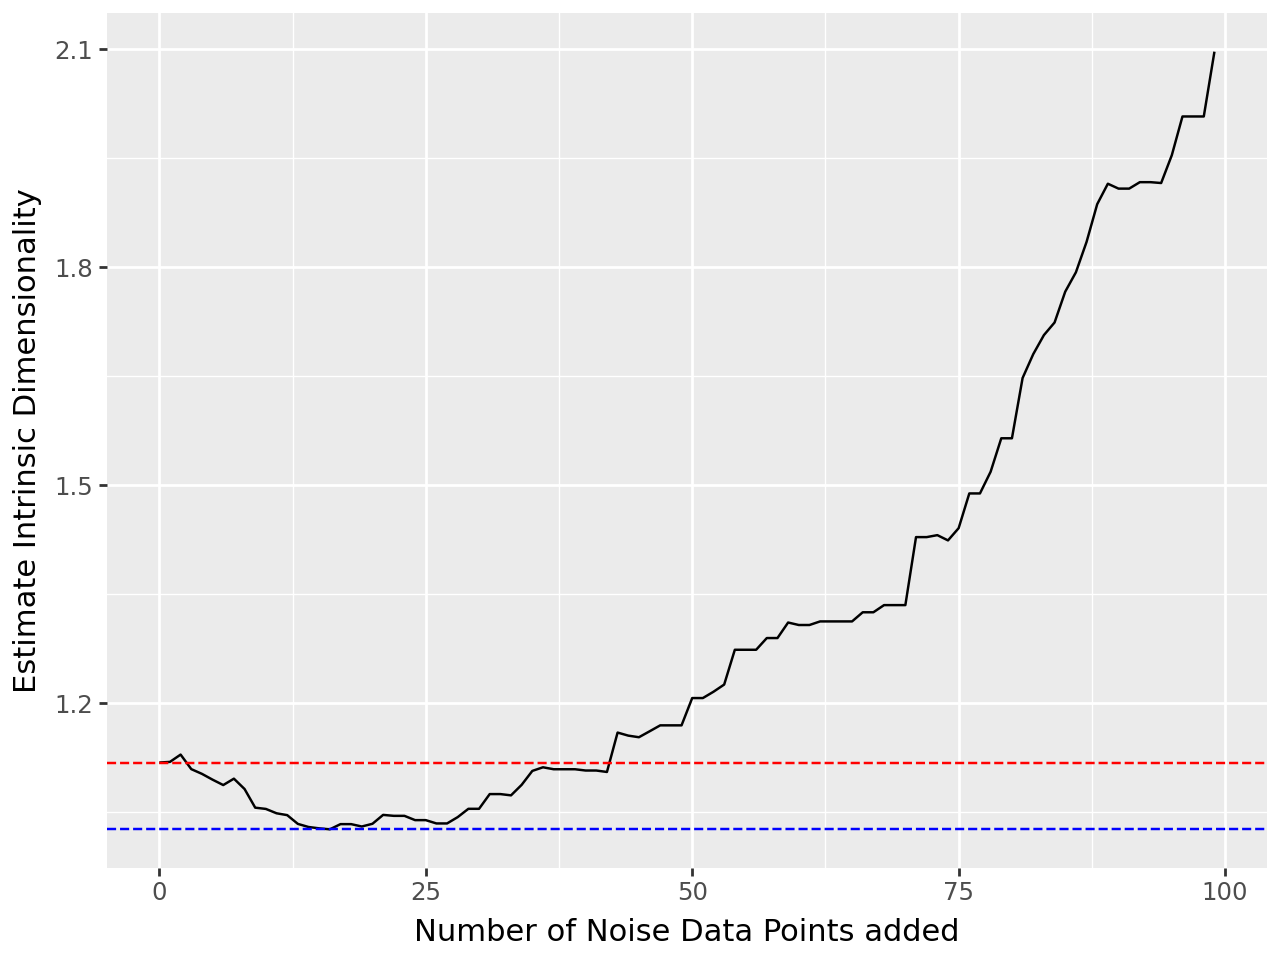

In [66]:
# plot noise_df
from plotnine import *
(
  ggplot(noise_df, aes(x='n', y='eid')) 
  + geom_line()
  + geom_hline(yintercept=eid, linetype='dashed', color='red')
  + geom_hline(yintercept=min(noise_df['eid']), linetype='dashed', color='blue')
  + labs(x='Number of Noise Data Points added', y='Estimate Intrinsic Dimensionality')
)

c) Is there any threshold number of noise size for intrinsic dim estimate ?

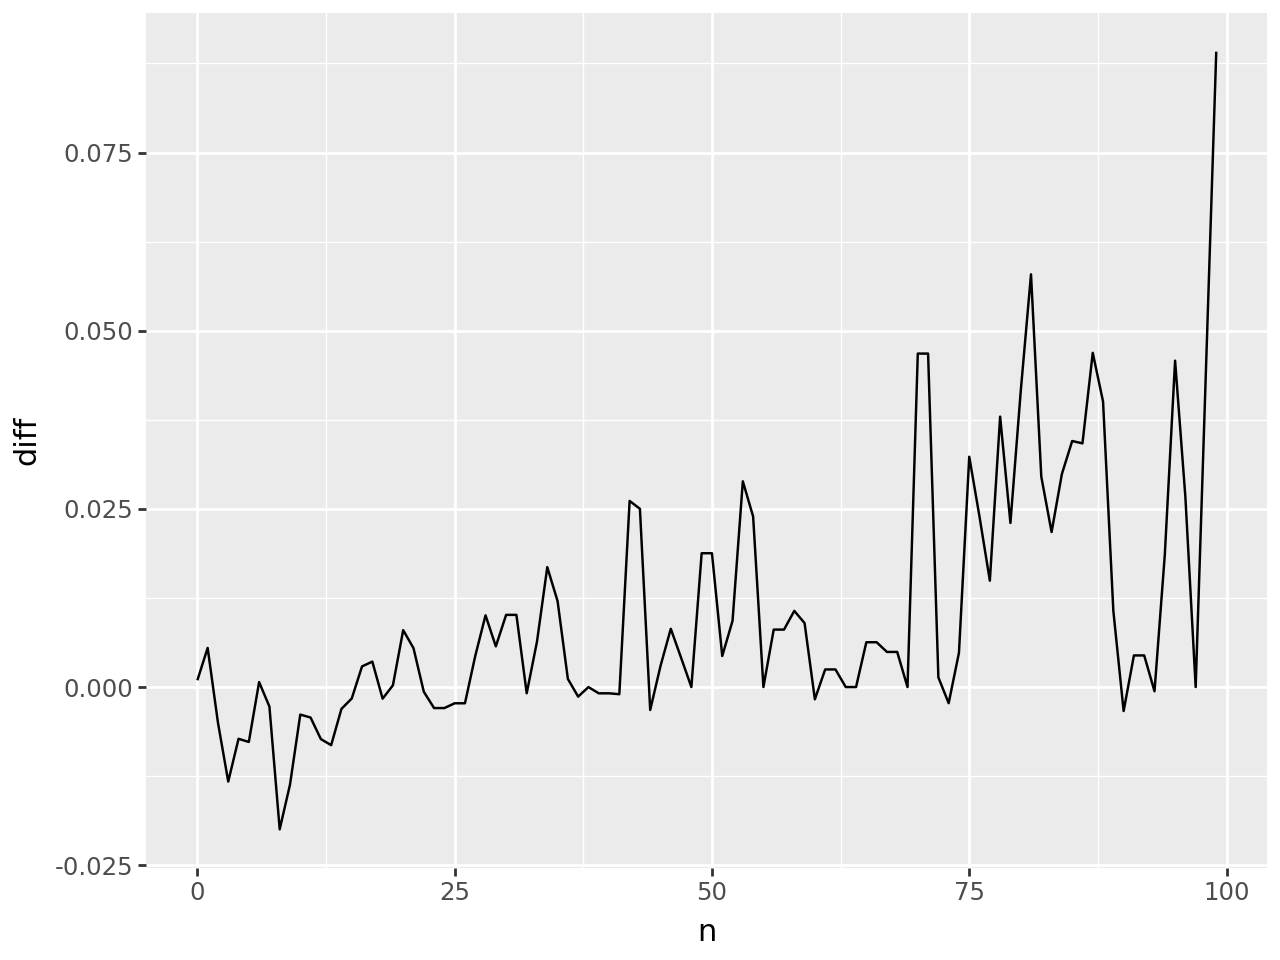

In [83]:
# # generate finite difference of noise_df
diff = np.gradient(noise_df['eid'])
diff_df = pd.DataFrame({'n': noise_df['n'], 'diff': diff})

(
  ggplot(diff_df, aes(x='n', y='diff'))
  + geom_line()
)